In [151]:
# import relevant libraries
import pandas as pd

# read in the csv file 
# data located on the sheet titled 'Data1'
raw_data = pd.read_excel("310104.xls", 'Data1')

# Display first 20 rows
# raw_data.head(20)

### Cleanse raw data, index dates and collect male population estimates by state

In [153]:
# Data Cleansing 

# Locate required data, go 40 periods back as 10 year lookback with quarterly data (10*4)
df = pd.DataFrame(raw_data.iloc[-40:, 0:8])

#rename columns 
df.columns = ['Date', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT']

state_list = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT']

# clean up date column and index datetime value

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.date
df.set_index('Date', inplace = True)

# Display first five rows to check
df.head()

,NSW,VIC,QLD,SA,WA,TAS,NT
Date,,,,,,,
2010-03-01,3540212,2698331,2191170,803566,1147794,252462,119772
2010-06-01,3548107,2705597,2199403,805365,1154064,252953,120516
2010-09-01,3557269,2713247,2207276,806976,1161154,253362,120926
2010-12-01,3565558,2720959,2214429,808037,1167862,253833,120979
2011-03-01,3577883,2732846,2224704,810216,1177289,254499,120802


### Find Quarterly population increase by state, find max increase for each state and quarter in which the increase occured 

In [126]:
# Create a dataframe pct_change to find the quarter-by-quater change in population by state
pct_change = pd.DataFrame()

for state in state_list:
    pct_change[str(state)] = df[state].pct_change()
    
# Find max percentage growth for each state
max_vals = dict(pct_change.max())

# Find the index for the max date (i.e. the date where max growth occurs)
max_dates = dict(pct_change.idxmax())



### Sort and display results by state 

In [148]:
results = pd.DataFrame([max_vals, max_dates])

results_T = results.T

results_T.columns = ['Max Percent Change', 'Occurence Date']

results_T = results_T.sort_values('Max Percent Change', ascending = False)

print ('Sorted Max Growth per state, with date index:')
results_T

Sorted Max Growth per state, with date index:


,Max Percent Change,Occurence Date
WA,0.0102216,2012-03-01
NT,0.00926306,2015-06-01
VIC,0.00796286,2017-03-01
QLD,0.00588352,2012-03-01
NSW,0.00534751,2017-03-01
TAS,0.00369506,2018-09-01
SA,0.00356912,2012-03-01


#### Final result:

In [155]:
print ('The state with the higest percentage change in population is: ' + results_T.index[0])
print (results_T.index[0] + ' experiend a population growth increase of ' + str(results_T.iloc[0, 0] * 100) + ' percent')
print ('This change occured in the quarter ending in ' + str(results_T.iloc[0, 1]))

The state with the higest percentage change in population is: WA
WA experiend a population growth increase of 1.0221551526203188 percent
This change occured in the quarter ending in 2012-03-01


### Data Visualisations 

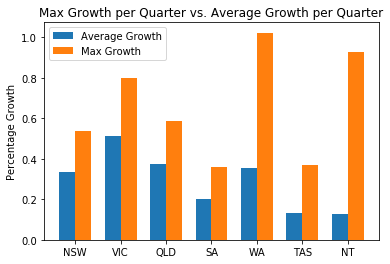

In [149]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT']
state_means = pct_change.mean().values * 100
state_max = pct_change.max().values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, state_means, width, label='Average Growth')
rects2 = ax.bar(x + width/2, state_max, width, label='Max Growth')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage Growth')
ax.set_title('Max Growth per Quarter vs. Average Growth per Quarter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

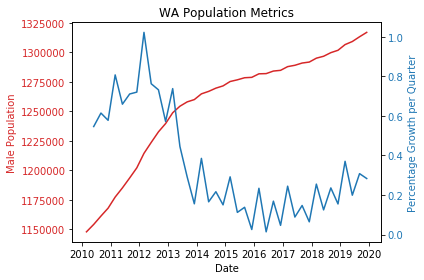

In [150]:
# Plot WA data
t = pct_change.index

# total population
data1 = df.WA

# population growth 
data2 = pct_change.WA * 100

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Male Population', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Percentage Growth per Quarter', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('WA Population Metrics')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()